# [Language Classification with Naive Bayes in Python](https://www.coursera.org/learn/language-classification/)

## Recommended Prerequisites for Successful Completion
* Intermediate level understanding of Python 3+ (e.g. list and dictionary comprehension)
* Basics of machine learning (e.g. the distinction between training and validation data)
* Mathematical probability (e.g. understanding Bayes' Theorem at a basic level)


## Project Outline
[**Introduction**](#intro)

[**Task 1**](#task1): Exploratory Data Analysis + Visualization

[**Task 2**](#task2): Data Cleaning and Preprocessing

[**Task 3**](#task3): Naive Bayes Model Introduction and Training

[**Task 4**](#task4): Highlighting Problems with Basic Model and Simple Fixes

[**Task 5**](#task5): Advanced Approach to Further Improve Performance

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = "svg"
plt.style.use("ggplot")

import string

from collections import defaultdict

from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

import joblib

from utils import *

<a id='intro'></a>
# Introduction

In [2]:
model = joblib.load("models/model.pkl")
vectoriser = joblib.load("models/vectoriser.pkl")

## [Slovak Wikipedia Entry](https://sk.wikipedia.org/wiki/Jazveč%C3%ADk)
Mnohí ľudia, ktorí vidia na ulici jazvečíka s podlhovastým telom vôbec nevedia o tom, že tento malý štvornohý a veľmi obľúbený spoločník je pri dobrom výcviku obratným, vynikajúcim a spoľahlivým poľovným psom. Ako poľovný pes je mnohostranne využiteľný, okrem iného ako durič na brlohárenie. Králičí jazvečík sa dokáže obratne pohybovať v králičej nore. S inými psami a deťmi si nie vždy rozumie.

## [Czech Wikipedia Entry](https://cs.wikipedia.org/wiki/Jezevč%C3%ADk)
Úplně první zmínky o psech podobných dnešním jezevčíkům nacházíme až ve Starém Egyptě, kde jsou vyobrazeni na soškách a rytinách krátkonozí psi s dlouhým hřbetem a krátkou srstí. Jednalo se ale o neustálený typ bez ustáleného jména. Další zmínky o jezevčících nacházíme až ve 14 - 15. století. Jedná se o psa, který se nejvíce podobá dnešnímu typu hladkosrstého standardního jezevčíka.


## [English Wikipedia Entry](https://en.wikipedia.org/wiki/Dachshund)
While classified in the hound group or scent hound group in the United States and Great Britain, the breed has its own group in the countries which belong to the Fédération Cynologique Internationale (World Canine Federation). Many dachshunds, especially the wire-haired subtype, may exhibit behavior and appearance that are similar to that of the terrier group of dogs.

In [3]:
text = "okrem iného ako durič na brlohárenie"
text = preprocess_function(text)
text = [split_into_subwords_function(text)]
text_vectorised = vectoriser.transform(text)

model.predict(text_vectorised)

array(['sk'], dtype='<U2')

<a id='task1'></a>
# Task 1: Data Exploration and Visualization

In [4]:
def open_file(filename):
    with open(filename, "r") as f:
        data = f.readlines()
    return data

In [5]:
data_raw = dict()
data_raw["sk"] = open_file("data/train_sk.txt")
data_raw["cs"] = open_file("data/train_cs.txt")
data_raw["en"] = open_file("data/train_en.txt")

data_raw["en"][0]

'I can understand your approach a little bit.\n'

In [6]:
def show_statistics(data):
    for language, sentences in data.items():

        number_of_sentences = 0
        number_of_words = 0
        number_of_unique_words = 0
        sample_extract = ""

        word_list = " ".join(sentences).split()

        number_of_sentences = len(sentences)
        number_of_words = len(word_list)
        number_of_unique_words = len(set(word_list))
        sample_extract = " ".join(sentences[0].split()[0:7])

        print(f"Language: {language}")
        print("-----------------------")
        print(f"Number of sentences\t:\t {number_of_sentences}")
        print(f"Number of words\t\t:\t {number_of_words}")
        print(f"Number of unique words\t:\t {number_of_unique_words}")
        print(f"Sample extract\t\t:\t {sample_extract}...\n")

In [7]:
show_statistics(data_raw)

Language: sk
-----------------------
Number of sentences	:	 100
Number of words		:	 2016
Number of unique words	:	 1322
Sample extract		:	 Pán de Grandes Pascual jasne vysvetlil, aká...

Language: cs
-----------------------
Number of sentences	:	 10
Number of words		:	 158
Number of unique words	:	 141
Sample extract		:	 Upozorňujeme, že jejím cílem je šetřit penězi...

Language: en
-----------------------
Number of sentences	:	 100
Number of words		:	 2381
Number of unique words	:	 1037
Sample extract		:	 I can understand your approach a little...



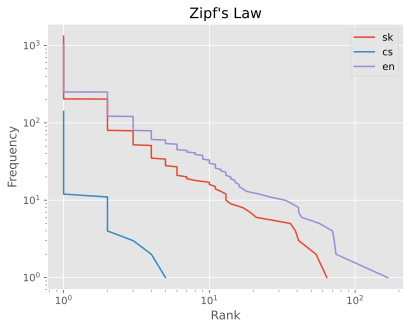

In [8]:
apply_law_of_zipf(data_raw)

The Exploratory Data Analysis has

- highlighted the class imbalance present in our training data
- allowed us to see how our data changed after preprocessing and further steps

<a id='task2'></a>
# Task 2: Data Cleaning and Preprocessing

In [9]:
def preprocess(text):
    """
    Removes punctuation and digits from a string, and converts all characters to lowercase.
    Also clears all \n and hyphens (splits hyphenated words into two words).
    """

    preprocessed_text = text.lower().replace("-", " ")

    translation_table = str.maketrans("\n", " ", string.punctuation + string.digits)
    preprocessed_text = preprocessed_text.translate(translation_table)

    return preprocessed_text

In [10]:
data_preprocessed = {k: [preprocess(sentence) for sentence in v] for k, v in data_raw.items()}

In [11]:
print("Raw data:")
show_statistics(data_raw)

print("\nPreprocessed data:")
show_statistics(data_preprocessed)

Raw data:
Language: sk
-----------------------
Number of sentences	:	 100
Number of words		:	 2016
Number of unique words	:	 1322
Sample extract		:	 Pán de Grandes Pascual jasne vysvetlil, aká...

Language: cs
-----------------------
Number of sentences	:	 10
Number of words		:	 158
Number of unique words	:	 141
Sample extract		:	 Upozorňujeme, že jejím cílem je šetřit penězi...

Language: en
-----------------------
Number of sentences	:	 100
Number of words		:	 2381
Number of unique words	:	 1037
Sample extract		:	 I can understand your approach a little...


Preprocessed data:
Language: sk
-----------------------
Number of sentences	:	 100
Number of words		:	 1996
Number of unique words	:	 1207
Sample extract		:	 pán de grandes pascual jasne vysvetlil aká...

Language: cs
-----------------------
Number of sentences	:	 10
Number of words		:	 155
Number of unique words	:	 133
Sample extract		:	 upozorňujeme že jejím cílem je šetřit penězi...

Language: en
-----------------------
Number

<a id='task3'></a>
# Task 3: The Naive Bayes Model

**Bayes' Theorem**

\begin{equation}
P(A | B)=\frac{P(B | A) \times P(A)}{P(B)}
\end{equation}

Now, let's translate this theory into our specific problem. In our case, where we want to categorise a sentence `my name is Ari` into one of `sk`, `cs`, or `en`, the following are the probabilities we want to determine.

\begin{equation}
P(\text {sk} | \text {my name is Ari})=\frac{P(\text {my name is Ari} | \text {sk}) \times P(\text {sk})}{P(\text {my name is Ari})}
\end{equation}

\begin{equation}
P(\text {cs} | \text {my name is Ari})=\frac{P(\text {my name is Ari} | \text {cs}) \times P(\text {cs})}{P(\text {my name is Ari})}
\end{equation}

\begin{equation}
P(\text {en} | \text {my name is Ari})=\frac{P(\text {my name is Ari} | \text {en}) \times P(\text {en})}{P(\text {my name is Ari})}
\end{equation}

## Unseen Data

Since we assume conditional independence across our features, our numerator term for any of the above equations can be broken into the following.

\begin{equation}
P(\text {my name is Ari} | \text {en}) = P(\text {my} | \text {en}) \times P(\text {name} | \text {en}) \times P(\text {is} | \text {en}) \times P(\text {Ari} | \text {en})
\end{equation}

## Vectorizing Training Data

|Sentence   	||   my   	| is 	| I 	| love 	| name 	| it 	| Ari 	|
|-----------------	||:------:	|:--:	|:-:	|:----:	|:----:	|:--------:	|:---:	|
| my name is Ari  	||    1   	|  1 	| 0 	|   0  	|   1  	|     0    	|  1  	|
| I love it 	||    0   	|  0 	| 1 	|   1  	|   0  	|     1    	|  0  	|

In [12]:
sentences_train, y_train = [], []

for k, v in data_preprocessed.items():
    for sentence in v:
        sentences_train.append(sentence)
        y_train.append(k)

In [13]:
vectorizer = CountVectorizer()

In [14]:
X_train = vectorizer.fit_transform(sentences_train)

In [15]:
X_train

<210x2208 sparse matrix of type '<class 'numpy.int64'>'
	with 3867 stored elements in Compressed Sparse Row format>

## Initializing Model Parameters and Training

In [16]:
naive_classifier = MultinomialNB()

naive_classifier.fit(X_train, y_train)

MultinomialNB()

## Vectorizing Validation Data and Evaluating Model

In [17]:
data_val = dict()
data_val["sk"] = open_file("data/val_sk.txt")
data_val["cs"] = open_file("data/val_cs.txt")
data_val["en"] = open_file("data/val_en.txt")

data_val_preprocessed = {k: [preprocess(sentence) for sentence in v] for k, v in data_val.items()}

In [18]:
sentences_val, y_val = [], []

for k, v in data_val_preprocessed.items():
    for sentence in v:
        sentences_val.append(sentence)
        y_val.append(k)

In [19]:
X_val = vectorizer.transform(sentences_val)

In [20]:
predictions = naive_classifier.predict(X_val)

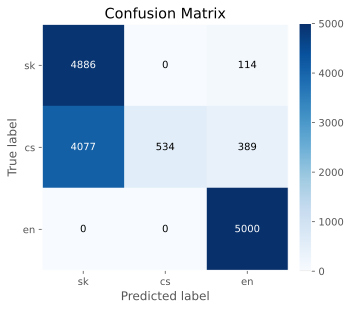

In [21]:
plot_confusion_matrix(y_val, predictions, ["sk", "cs", "en"])

In [22]:
f1_score(y_val, predictions, average="weighted")

0.6149824401040264

<a id='task4'></a>
# Task 4: Simple Adjustments and Highlighting Model Shortcomings

The Naive Bayes Model's reliance on Bayes' Theorem means that if you have a class imbalance in your data, the model might be biased to choosing the class with the most samples in your training data.

This can be avoided by ignoring the prior probability of the classes (setting a uniform probability across all classes).

In [23]:
naive_classifier = MultinomialNB(alpha=0.0001, fit_prior=False)

naive_classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.0001, fit_prior=False)

In [24]:
predictions = naive_classifier.predict(X_val)

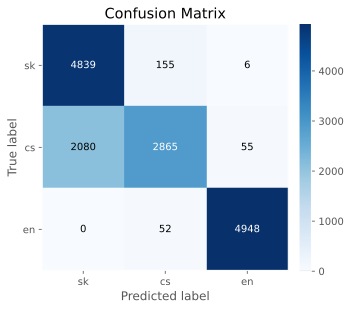

In [25]:
plot_confusion_matrix(y_val, predictions, ["sk", "cs", "en"])

The confusion matrix dictates what classes a given model might predict incorrectly based on the true class, and the predicted class.

A classification model with perfect performance will have a confusion matrix with values only on the diagonal.

Our model is confusing Slovak and Czech, two very similar languages. The confusion matrix allows us to see this phenomenon, and makes it clear that predicting English is not a problem for the model.

In [26]:
f1_score(y_val, predictions, average="weighted")

0.8368507601649364

Note: The reason stemming and lemmatisation are not used is that they would add an extra layer of complexity and ambiguity to the problem. At prediction time, ou would have to potentially stem/lemmatize with all three languages, and then see which prediction is best.

<a id='task5'></a>
# Task 5: Using Subwords to Shift Perspective

Using subword units improves performance because

- it helps ease the class imbalance in the training data
- it breaks up incoming words, that the model has not seen during training at all, into subword units it maybe has seen

**Dummy Dataset**

playing ; eating ; play ; reads ; tea

**Step 1**

Break each word into characters

playing > p l a y i n g


**Step 2**

Find common character sequences

ea, ing, play

**Step 3**

Convert dataset using these subwords into

play ing ; ea t ing ; play ; r ea d s ; t ea

In [27]:
"""https://arxiv.org/abs/1508.07909"""

import re, collections


def get_stats(vocab):
    pairs = collections.defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols) - 1):
            pairs[symbols[i], symbols[i + 1]] += freq
    return pairs


def merge_vocab(pair, v_in):
    v_out = {}
    bigram = re.escape(" ".join(pair))
    p = re.compile(r"(?<!\S)" + bigram + r"(?!\S)")
    for word in v_in:
        w_out = p.sub("".join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

In [28]:
def get_vocab(data):

    words = []
    for sentence in data:
        words.extend(sentence.split())

    vocab = defaultdict(int)
    for word in words:
        vocab[" ".join(word)] += 1

    return vocab

In [29]:
vocab = get_vocab(sentences_train)

In [30]:
"""https://arxiv.org/abs/1508.07909"""

for i in range(100):
    pairs = get_stats(vocab)
    best = max(pairs, key=pairs.get)
    vocab = merge_vocab(best, vocab)

In [31]:
merges = defaultdict(int)

for k, v in vocab.items():
    for subword in k.split():
        if len(subword) >= 2:
            merges[subword] += v

In [32]:
merge_ordered = sorted(merges, key=merges.get, reverse=True)

In [33]:
joblib.dump(merge_ordered, "models/merges.pkl")

['models/merges.pkl']

In [34]:
def split_into_subwords(text):
    merges = joblib.load("models/merges.pkl", "rb")
    subwords = []
    for word in text.split():
        for subword in merges:
            subword_count = word.count(subword)
            if subword_count > 0:
                word = word.replace(subword, " ")
                subwords.extend([subword] * subword_count)
    return " ".join(subwords)

In [35]:
split_into_subwords("hello my name is ari")

'lo na me is ar'

In [36]:
data_preprocessed_subwords = {k: [split_into_subwords(sentence) for sentence in v] for k, v in data_preprocessed.items()}

In [37]:
show_statistics(data_preprocessed_subwords)

Language: sk
-----------------------
Number of sentences	:	 100
Number of words		:	 3431
Number of unique words	:	 75
Sample extract		:	 de an de al as ne as...

Language: cs
-----------------------
Number of sentences	:	 10
Number of words		:	 239
Number of unique words	:	 59
Sample extract		:	 po je me or že je le...

Language: en
-----------------------
Number of sentences	:	 100
Number of words		:	 3863
Number of unique words	:	 75
Sample extract		:	 an st an er ou ro ch...



In [38]:
subwords_train = []

for sentence in sentences_train:
    subwords_train.append(split_into_subwords(sentence))

In [39]:
subwords_val = []

for sentence in sentences_val:
    subwords_val.append(split_into_subwords(sentence))

In [40]:
vectoriser = CountVectorizer()

In [41]:
X_train = vectoriser.fit_transform(subwords_train)

In [42]:
X_val = vectoriser.transform(subwords_val)

The Multinomial Naive Bayes Model breaks down when a word (or token) has not been seen in the training set for a certain language, but exists at testing.

This can be avoided by using a smoothing parameter (alpha).

This assigns a low probability to tokens not seen in the training data for a given language, allowing for the multiplicative effects of probability theory to still give a valid probability of >0.

In [43]:
naive_classifier = MultinomialNB(alpha=1, fit_prior=False)

In [44]:
naive_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1, fit_prior=False)

In [45]:
predictions = naive_classifier.predict(X_val)

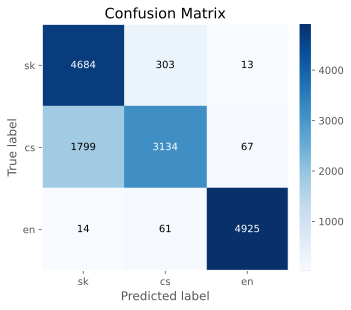

In [46]:
plot_confusion_matrix(y_val, predictions, ["sk", "cs", "en"])

In [47]:
f1_score(y_val, predictions, average="weighted")

0.8456381060126386

In [48]:
joblib.dump(naive_classifier, "models/model.pkl")
joblib.dump(vectoriser, "models/vectoriser.pkl")

['models/vectoriser.pkl']